## Import Module

In [1]:
import ollama
from ollama import chat , generate


## Checking Model
Get list of available models on Device

In [ ]:
ollama.list()

## Download Model
You can get list of available models right here https://ollama.com/library

In [ ]:
ollama.pull('llama3.1')

## Test Generation With Ollama

In [ ]:
response = generate(model="llama3.1",prompt="สวัสดี")


In [ ]:
print(response["response"])

## Test Chat With Ollama

### Prompt Setup

In [ ]:
messages = [
#   {
#     'role': 'system',
#     'content': 'You are helpful assistant',
#   },
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
#   {
#       'role': 'assistant',
#       'content': 'answer from assistant'
#   }
]

### Generate Answer

In [ ]:
conservation = chat(model='llama3.1',messages=messages)

In [ ]:
print(conservation['message']['content'])

### Chat with Memory
This is the method employed to enhance an LLM's memory capacity, enabling it to maintain conversational context across extended interactions.

In [ ]:
messages = [
  {
    'role': 'system',
    'content': 'You are helpful assistant',
  },
  {
    'role': 'user',
    'content': 'Why is the sky blue?',
  },
  {
      'role': 'assistant',
      'content': """The sky appears blue to us because of a phenomenon called scattering, which occurs when sunlight interacts with the tiny molecules of gases in the Earth's atmosphere.

Here's what happens:

1. **Sunlight enters the atmosphere**: When the sun shines, it sends out all kinds of electromagnetic radiation, including visible light, ultraviolet (UV) radiation, and infrared (IR) radiation.
2. **Scattering occurs**: As sunlight travels through the atmosphere, it encounters tiny molecules of gases like nitrogen (N2) and oxygen (O2). These molecules are much smaller than the wavelength of light, so they can't absorb or reflect light in a significant way.
3. **Shorter wavelengths scattered more**: However, these tiny molecules are effective at scattering shorter-wavelength light, such as blue and violet light. This is because the size of the molecules is comparable to the wavelength of these colors. As a result, much of the blue and violet light is scattered in all directions by the atmosphere.
4. **Our eyes perceive the blue sky**: When we look up at the sky, our eyes are seeing primarily the blue and violet light that has been scattered in our direction. This is why the sky appears blue to us.

The other colors of the spectrum, like red and green, have longer wavelengths than blue and violet, so they're not scattered as much by the atmosphere. Instead, they pass through the atmosphere with relatively little scattering, which means we see them as a more direct, unscattered beam of light.

So, to summarize: the sky appears blue because of the way that sunlight interacts with the tiny molecules in the Earth's atmosphere, causing shorter wavelengths (like blue and violet) to be scattered in all directions, while longer wavelengths pass through relatively undisturbed."""
  },
{
    'role': 'user',
    'content': 'What did i ask you?',
  },
  
]

In [ ]:
conservation = chat(model='llama3.1',messages=messages)

In [ ]:
print(conservation['message']['content'])

## Function Calling from scratch
![function Calling.png](<attachment:function Calling.png>)
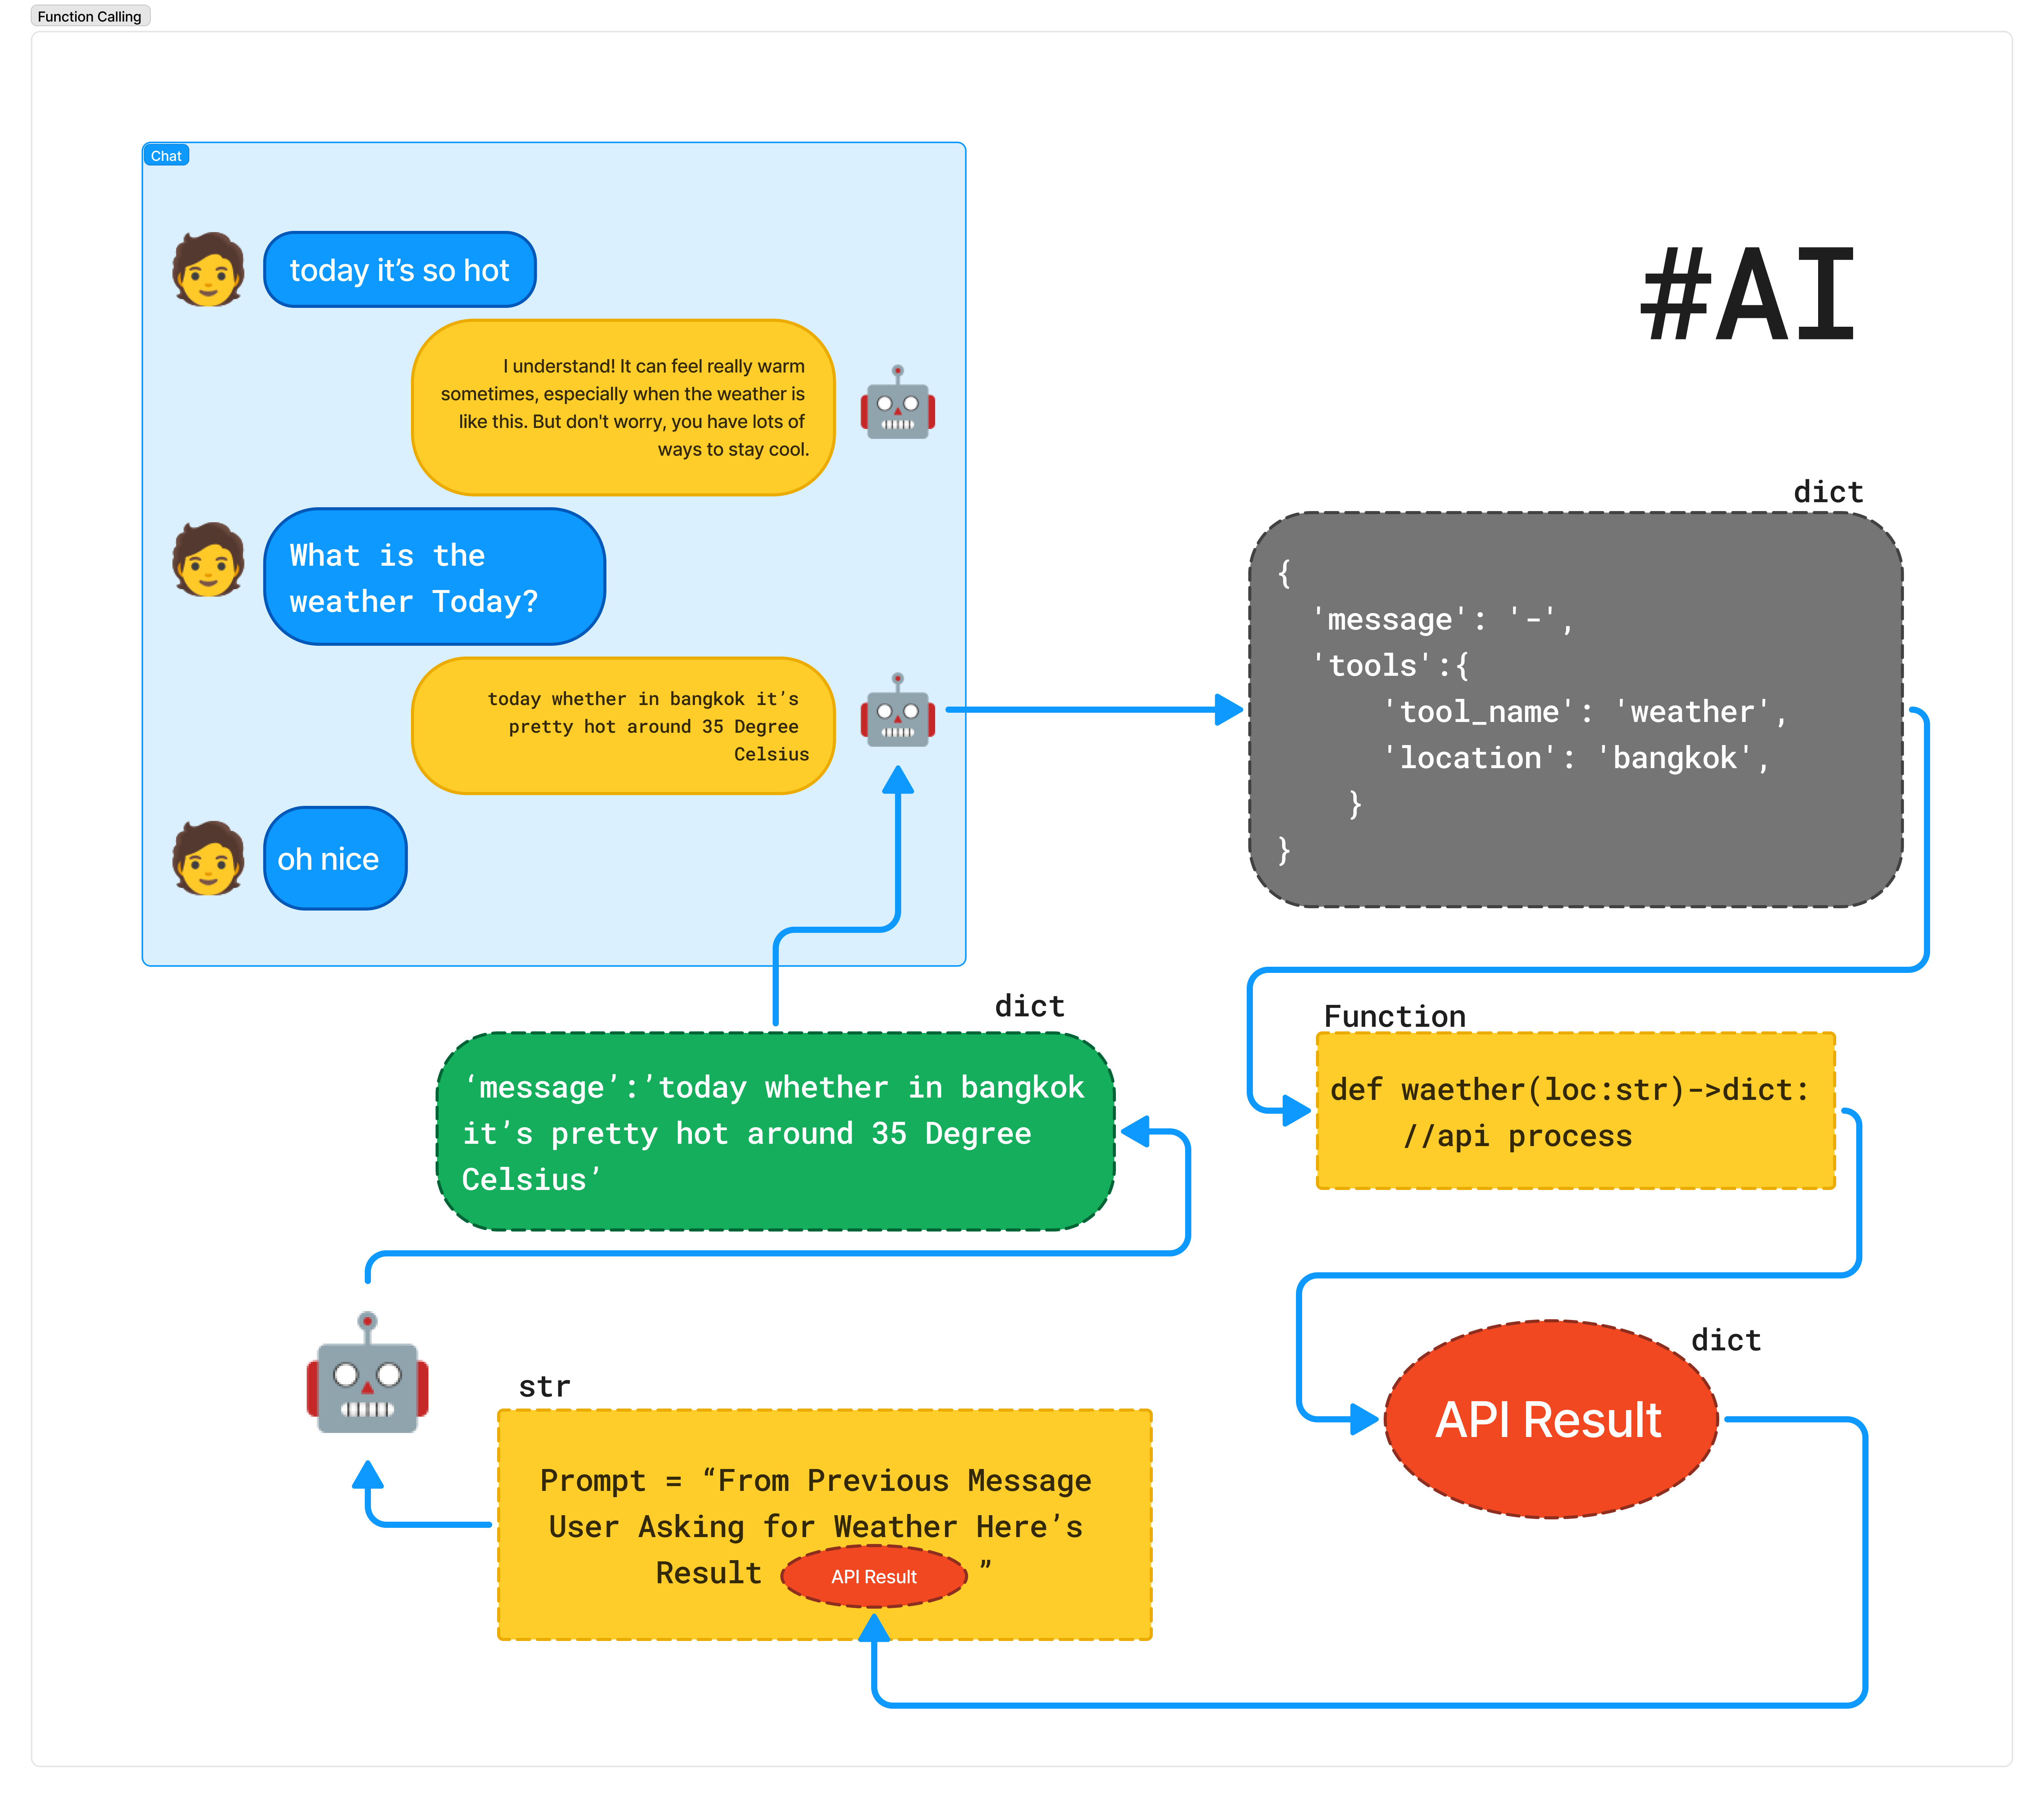

In [24]:
system_prompt = """**When responding to a user's request, please follow these guidelines:**

1. **Analyze the request:** Determine if the user is asking for current weather information. Look for phrases like "weather now", "current temperature", "what's it like outside", etc. The user might also explicitly mention a location or ask about the weather in their current location. 

2. **Call the tool when necessary:** If the user's request needs current weather data, call the `get_current_weather` function.

3. **Structure the function call:** Provide the necessary parameters in a JSON object, like this:

```json
{{
    "name": "get_current_weather",
    "arguments": {{
        "location": "<CITY, STATE>", 
        "unit": "<celsius or fahrenheit>" 
    }}
}}
tools :
{tool}
"""

In [25]:
tools = """
    {{
        "type": "function",
        "function": {{
            "name": "get_current_weather",
            "description": "Get the current weather in a given location",
            "parameters": {{
                "type": "object",
                "properties": {{
                    "location": {{
                        "type": "string",
                        "description": "The city and state, e.g. San Francisco, CA",
                    }},
                    "unit": {{
                        "type": "string", 
                        "enum": ["celsius", "fahrenheit"]}},
                }},
                "required": ["location"],
            }},
        }},   
    }}"""

### Attach tool to System prompt

In [26]:
system_prompt = system_prompt.format(tool = tools)

In [5]:
print(system_prompt)

**When responding to a user's request, please follow these guidelines:**

1. **Analyze the request:** Determine if the user is asking for current weather information. Look for phrases like "weather now", "current temperature", "what's it like outside", etc. The user might also explicitly mention a location or ask about the weather in their current location. 

2. **Call the tool when necessary:** If the user's request needs current weather data, call the `get_current_weather` function.

3. **Structure the function call:** Provide the necessary parameters in a JSON object, like this:

```json
{
    "name": "get_current_weather",
    "arguments": {
        "location": "<CITY, STATE>", 
        "unit": "<celsius or fahrenheit>" 
    }
}
tools :

    {{
        "type": "function",
        "function": {{
            "name": "get_current_weather",
            "description": "Get the current weather in a given location",
            "parameters": {{
                "type": "object",
          

### Define Function / Tool

In [143]:
def get_current_weather(location, unit="celsius"):
  """
  Simulates fetching current weather data.

  Args:
      location (str): The city and state/country, e.g., "London, UK".
      unit (str, optional): The unit of temperature, either "celsius" or "fahrenheit". Defaults to "celsius".

  Returns:
      dict: A dictionary containing the weather information or an error message.
  """

  # Hardcoded weather data (replace with actual API calls in a real implementation)
  weather_data = {
      "London, UK": {
          "temperature": 18,
          "condition": "Partly cloudy"
      },
      "Bangkok, Thailand": {
          "temperature": 32,
          "condition": "Sunny"
      }
  }

  if location not in weather_data:
      return {"error": "Weather data not available for this location."}

  # Convert temperature to Fahrenheit if requested
  temperature = weather_data[location]["temperature"]
  if unit == "fahrenheit":
      temperature = (temperature * 9/5) + 32

  return {
      "location": location,
      "temperature": temperature,
      "unit": unit,
      "condition": weather_data[location]["condition"]
  }

### Get Response from LLM

In [144]:
message = [
  {
    'role': 'system',
    'content': system_prompt,
  },
  {
    'role': 'user',
    'content': "What's the weather like in bangkok right now?",
  },
]

In [145]:
msg = chat(model='llama3.1',
           messages=message)


In [146]:
msg

{'model': 'llama3.1',
 'created_at': '2024-08-21T04:21:15.9036701Z',
 'message': {'role': 'assistant',
  'content': '{\n  "name": "get_current_weather",\n  "arguments": {\n    "location": "Bangkok, Thailand",\n    "unit": "celsius"\n  }\n}'},
 'done_reason': 'stop',
 'done': True,
 'total_duration': 1106843400,
 'load_duration': 21332700,
 'prompt_eval_count': 323,
 'prompt_eval_duration': 257580000,
 'eval_count': 37,
 'eval_duration': 824839000}

In [147]:
msg['message']['content']

'{\n  "name": "get_current_weather",\n  "arguments": {\n    "location": "Bangkok, Thailand",\n    "unit": "celsius"\n  }\n}'

### Exucute Function

In [148]:
import json

In [149]:
arg = json.loads(msg['message']['content'])
data = get_current_weather(location=arg['arguments']['location'],unit=arg['arguments']['unit'])

### Return from Function

In [150]:
print(data)

{'location': 'Bangkok, Thailand', 'temperature': 32, 'unit': 'celsius', 'condition': 'Sunny'}


### Regenerate Answer form json

Add new msg to LLM

In [151]:
message.append({
 'role':'user',
    'content':f"Answer my question with summary of this\n Result from Tools : {data} \n in conversations form",
})   

#### Regenerate

In [152]:
chat(model='llama3.1',messages=message)

{'model': 'llama3.1',
 'created_at': '2024-08-21T04:21:16.7157733Z',
 'message': {'role': 'assistant',
  'content': 'The current weather in Bangkok is sunny with a temperature of 32 degrees Celsius. No rain or clouds are expected at the moment. Is there anything else I can help you with?'},
 'done_reason': 'stop',
 'done': True,
 'total_duration': 763409900,
 'load_duration': 18502400,
 'prompt_eval_count': 368,
 'prompt_eval_duration': 55930000,
 'eval_count': 37,
 'eval_duration': 684849000}